### Feature Selection and Modeling

In this section, we will choose the best feature/s that we need to use to create a model that will predict whether a particular NBA game will be a win or a lose. Random Forest is used in order to build this model. Due to some limitations, researcher is not able to output a visualization of which tree presents the best predictive model. However, for this purpose, the top 5 most important features were identified first to come up with a visualization using Decision Tree. Although, it may be different, researcher thinks that the visualization presented will still be able to help users, in this instance, the coaches determine what they need to do in order to win their next game.

In [1]:
import pandas as pd
import numpy as np

nba = pd.read_csv(r'https://raw.githubusercontent.com/doryaswi/Capstone/master/working_nba_df.csv')
nba.drop('Unnamed: 0',axis=1,inplace=True)
nba = nba.reset_index()
nba.drop('index',axis=1,inplace=True)
nba.head()

,game_id,data_set,date,away_score,home_score,away_team,home_team,W_or_L,num_block,shots_made,shots_missed,turnover,top_player_score,num_players,num_assist,ft_last2min,ft_total,ft_pct,scorediff,fg_pct
0,21600001,2016-2017 Regular Season,10/25/2016,88,117,NYK,CLE,win,72,45,49,15,29,4.0,31,2.0,19,0.736842,0,0.478723
1,21600002,2016-2017 Regular Season,10/25/2016,104,113,UTA,POR,win,47,39,36,16,39,4.0,22,8.0,22,1.000000,7,0.520000
2,21600003,2016-2017 Regular Season,10/25/2016,129,100,SAS,GSW,lose,49,40,45,17,27,4.0,24,NaN,18,0.722222,-5,0.470588
3,21600004,2016-2017 Regular Season,10/26/2016,108,96,MIA,ORL,lose,65,34,55,13,20,5.0,20,2.0,28,0.785714,0,0.382022
4,21600005,2016-2017 Regular Season,10/26/2016,121,130,DAL,IND,win,69,47,46,16,30,5.0,30,6.0,34,0.764706,9,0.505376


In [2]:
copied_nba = nba.copy()

In [3]:
feature_nba = nba.loc[:,['W_or_L','away_score','away_team','home_team','num_block','shots_made','shots_missed',\
                        'turnover','top_player_score','num_players','num_assist','ft_last2min','ft_total','ft_pct',\
                        'scorediff','fg_pct']]
feature_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13513 entries, 0 to 13512
Data columns (total 16 columns):
W_or_L              13513 non-null object
away_score          13513 non-null int64
away_team           13513 non-null object
home_team           13513 non-null object
num_block           13513 non-null int64
shots_made          13513 non-null int64
shots_missed        13513 non-null int64
turnover            13513 non-null int64
top_player_score    13513 non-null int64
num_players         13512 non-null float64
num_assist          13513 non-null int64
ft_last2min         11611 non-null float64
ft_total            13513 non-null int64
ft_pct              13513 non-null float64
scorediff           13513 non-null int64
fg_pct              13513 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 1.6+ MB


In [4]:
feature_nba['ft_last2min'].fillna(0,inplace=True)

In [5]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float32)

### Change Win or Lose to 0 or 1

In [6]:
feature_nba.W_or_L.replace('win', 1, inplace = True)
feature_nba.W_or_L.replace('lose', 0, inplace = True)

In [7]:
feature_nba.head()

,W_or_L,away_score,away_team,home_team,num_block,shots_made,shots_missed,turnover,top_player_score,num_players,num_assist,ft_last2min,ft_total,ft_pct,scorediff,fg_pct
0,1,88,NYK,CLE,72,45,49,15,29,4.0,31,2.0,19,0.736842,0,0.478723
1,1,104,UTA,POR,47,39,36,16,39,4.0,22,8.0,22,1.000000,7,0.520000
2,0,129,SAS,GSW,49,40,45,17,27,4.0,24,0.0,18,0.722222,-5,0.470588
3,0,108,MIA,ORL,65,34,55,13,20,5.0,20,2.0,28,0.785714,0,0.382022
4,1,121,DAL,IND,69,47,46,16,30,5.0,30,6.0,34,0.764706,9,0.505376


In [8]:
feature_nba = pd.get_dummies(feature_nba)
feature_nba.head()

,W_or_L,away_score,num_block,shots_made,shots_missed,turnover,top_player_score,num_players,num_assist,ft_last2min,...,home_team_ORL,home_team_PHI,home_team_PHX,home_team_POR,home_team_SAC,home_team_SAS,home_team_SEA,home_team_TOR,home_team_UTA,home_team_WAS
0,1,88,72,45,49,15,29,4.0,31,2.0,...,0,0,0,0,0,0,0,0,0,0
1,1,104,47,39,36,16,39,4.0,22,8.0,...,0,0,0,1,0,0,0,0,0,0
2,0,129,49,40,45,17,27,4.0,24,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,108,65,34,55,13,20,5.0,20,2.0,...,1,0,0,0,0,0,0,0,0,0
4,1,121,69,47,46,16,30,5.0,30,6.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
nba_clean = clean_dataset(feature_nba)

In [10]:
nba_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13512 entries, 0 to 13512
Data columns (total 78 columns):
W_or_L              13512 non-null float32
away_score          13512 non-null float32
num_block           13512 non-null float32
shots_made          13512 non-null float32
shots_missed        13512 non-null float32
turnover            13512 non-null float32
top_player_score    13512 non-null float32
num_players         13512 non-null float32
num_assist          13512 non-null float32
ft_last2min         13512 non-null float32
ft_total            13512 non-null float32
ft_pct              13512 non-null float32
scorediff           13512 non-null float32
fg_pct              13512 non-null float32
away_team_ATL       13512 non-null float32
away_team_BKN       13512 non-null float32
away_team_BOS       13512 non-null float32
away_team_CHA       13512 non-null float32
away_team_CHI       13512 non-null float32
away_team_CLE       13512 non-null float32
away_team_DAL       13512 non-n

### Feature Selection

In order to determine the best model to predict the target variable using Random Forest, it is recommended that we optimize or tune some of the hyperparameters needed to generate our "trees". The three hyperparameters we are trying to optimize are feature sampling (number of features we need to use), number of estimators (how many random forest trees we need to build an accurate model), and number of leaves (to avoid overfitting). Once this is determined, we will use these parameters to train and test our model.

#### Hyperparameter Tuning: 
#### I. Feature Sampling

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
y = nba_clean.loc[:,'W_or_L']
X = nba_clean.iloc[:,1:]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
def feature_sampling_scores (max_features_list):
    feature_sampling_scores_list = []
    for max_feature in max_features_list:
        rfr = RandomForestRegressor(max_features=max_feature, random_state=1)
        rfr.fit(X_train, y_train)
        score = (max_feature, rfr.score(X_val,y_val))
        feature_sampling_scores_list.append(score)
    return feature_sampling_scores_list

In [17]:
feature_sampling_scores([0.5,'log2','sqrt',None])

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[(0.5, 0.7412679135896383),
 ('log2', 0.584586535798546),
 ('sqrt', 0.6164834233192495),
 (None, 0.7553412069927125)]

In this section, we can see that when using max_features 0.5 or None, it will be able to create the most accurate model at around 74%. Instead of using None, we will be using 0.5 of half of our available features each time a model will be created.

#### II. Number of Trees

In [18]:
rfr_n_trees = RandomForestRegressor(n_estimators=50, random_state=1, max_features=0.5)

In [19]:
rfr_n_trees.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [20]:
rfr_n_trees.score(X_val,y_val)

0.7681046015482696

In [21]:
tree_predictions = np.vstack([estimator.predict(X_val) for estimator in rfr_n_trees.estimators_])

In [22]:
tree_predictions.shape

(50, 2162)

In [23]:
from sklearn.metrics import r2_score
r2_scores = [r2_score(y_val, np.mean(tree_predictions[:i + 1], axis = 0)) for i in range(0, len(rfr_n_trees.estimators_)) ]

In [24]:
from graph import trace_values, plot
x_vals = list(range(1, len(rfr_n_trees.estimators_) + 1))
trace = trace_values(x_vals, r2_scores)
plot([trace])

In this section, we started with using 50 trees as estimators. In the chart above, it can be observed that at about 25 estimators, the scores will be stable enough with score accuracy of 76%. For these reasons, we will be using this number as the number of trees to train our model.

#### III. Number of Leaves

In [26]:
def num_leaves_wrapped_scores (min_samples):
    num_leaves_wrapped_scores_list = []
    for min_sample in min_samples:
        rfr = RandomForestRegressor(n_estimators=50, min_samples_leaf=min_sample, random_state=1)
        rfr.fit(X_train, y_train)
        score = rfr.score(X_val,y_val)
        num_leaves_wrapped_scores_list.append(score)
    return num_leaves_wrapped_scores_list

In [27]:
%%time
scores = num_leaves_wrapped_scores(min_samples)

Wall time: 8min 47s


In [28]:
scores[:5]

[0.7857520829893803,
 0.7892224190903114,
 0.7886992877402331,
 0.7848017933642908,
 0.7828059093509006]

In [29]:
wrapped_scores = np.column_stack((min_samples, scores))

In [30]:
trace_1 = trace_values(wrapped_scores[:, 0], wrapped_scores[:, 1])

In [31]:
plot([trace_1])

In [32]:
X_val.shape

(2162, 77)

In [33]:
combined_X = np.vstack((X_train, X_val))

In [34]:
combined_y = np.concatenate((y_train, y_val))

In [35]:
rfr3 = RandomForestRegressor(n_estimators=50, random_state=1, max_features=0.5)
rfr3.fit(combined_X, combined_y)
rfr3.score(X_test,y_test)

0.7603685399785198

For this part, the scores are also pretty stable. If we want to maintain a score of around 74% and prevent overfitting, we should use at least a sample of 24 games in each leaf.

### Fit Model Using Hyperparameters Determined Above

In [36]:
from sklearn.model_selection import train_test_split

X_train, X, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 25, max_features=0.5, min_samples_leaf=24).fit(X_train, y_train)

In [38]:
rfr.score(X_val, y_val)

0.6985840504870651

The model was validated and tested using the hyperparameters determined above. After fitting the model on the validation test data, the model is found to still be accurate enough at 69.85% to predict whether a game is going to be a win or a lose.

### Find top 5 most important features to predict whether game is going to be a Win or Lose

Using the eli5 library and permutations, we determine which feature is the most important one to determine whether a game is going to be a win or a lose. This will help users/coaches, to determine what their next steps will be and strategies for their upcoming game to help them win. For example, identifying who is going to be in the court because the player is a shooter, good at blocking, assisting, etc. based on what is the most important feature to make winning more likely to happen.

In [55]:
import eli5
from eli5.sklearn import PermutationImportance


perm = PermutationImportance(rfr).fit(X_val, y_val)
eli5.show_weights(perm, feature_names=feature_names)

Weight,Feature
0.7090 ± 0.0317,away_score
0.2307 ± 0.0166,shots_made
0.2263 ± 0.0053,fg_pct
0.1540 ± 0.0073,ft_total
0.0263 ± 0.0025,num_block
0.0154 ± 0.0014,num_assist
0.0124 ± 0.0034,ft_pct
0.0109 ± 0.0030,top_player_score
0.0107 ± 0.0017,scorediff
0.0026 ± 0.0003,shots_missed


Based on the above results, it shows that the 5 most important features are away score, shots made, field goal percentage, total number of freethrows, and number of blocks made.

#### Determine how accurate our model will be using the top 5 features

In [56]:
selected_permutation = ['away_score', 'shots_made', 'fg_pct', 'ft_total', 'num_block']

In [57]:
df_X_train = pd.DataFrame(X_train, columns=feature_names)
selected_X_train = df_X_train[selected_permutation]

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr_permutation = RandomForestRegressor(n_estimators = 25, max_features=0.5, min_samples_leaf=24).fit(selected_X_train, y_train)

In [59]:
X_val = pd.DataFrame(X_val, columns=feature_names)
X_val_permute = X_val[selected_permutation]

rfr_permutation.score(X_val_permute, y_val)

0.6715109229869594

In [60]:
eli5.show_weights(rfr_permutation, feature_names=selected_permutation)

Weight,Feature
0.4099 ± 0.0979,away_score
0.2528 ± 0.2223,fg_pct
0.1710 ± 0.2031,shots_made
0.1012 ± 0.0609,ft_total
0.0652 ± 0.0658,num_block


Using the top 5 most important features, we were able to validate the model and it is producing an accuracy of around 67% which is still a good enough model to predict whether a game is going to be a win or a lose.

### Use Decision Tree to Visualize Hypothesis Function (Is it a Win or a Lose?)

In [61]:
selected_X = nba_clean.loc[:,['away_score','shots_made','fg_pct','ft_total','num_block']]

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

selected_X_train, selected_X_test, y_train, y_test = train_test_split(selected_X, y, test_size=0.33, random_state=42)

model = DecisionTreeClassifier()
model.fit(selected_X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


graph_1 = Source(tree.export_graphviz(model, out_file=None,
                                feature_names=selected_X_train.columns))

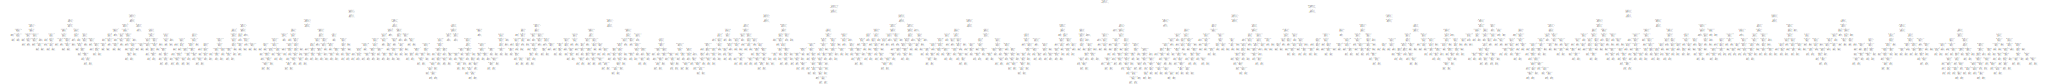

In [64]:
graph_1

### Modeling without Overfitting

To prevent overfitting, we want to determine number of samples in each leaf that will still make our prediction accurate. 

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
import numpy as np
num_sample_scores = []
for sample in range(1, 100):
    dtc = DecisionTreeRegressor(min_samples_leaf=sample)
    dtc.fit(selected_X_train, y_train)
    score = dtc.score(selected_X_test, y_test)
    num_sample_scores.append(np.array([sample, score]))

In [67]:
num_sample_scores = np.array(num_sample_scores)

In [68]:
num_sample_scores[:3]

array([[1.        , 0.55146378],
       [2.        , 0.61156483],
       [3.        , 0.64377021]])

In [69]:
from graph import trace_values, plot
trace = trace_values(num_sample_scores[:, 0], num_sample_scores[:, 1])
plot([trace])

In [70]:
dtc = DecisionTreeRegressor(min_samples_leaf=13)
dtc.fit(selected_X_train, y_train)
dtc.score(selected_X_test, y_test)

0.7138937761077649

After running the DecisionTreeRegressor, we can see that having at least 13 samples in our leaves will make our model more stable and still run at an accuracy of 71.39%. For this reason, we use this as minimum sample in a leaf and run it again and provide the visual for the decision tree hypothesis function that will determine whether a game is going to be a win or a lose.

In [71]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


from sklearn import tree
from IPython.display import SVG, display, Image
from graphviz import Source
import pydotplus

y_train = pd.DataFrame(y_train,columns=['W_or_L'])

dot_data = tree.export_graphviz(dtc, out_file=None, 
                                feature_names=selected_X_train.columns,  
                                class_names=y_train.columns)

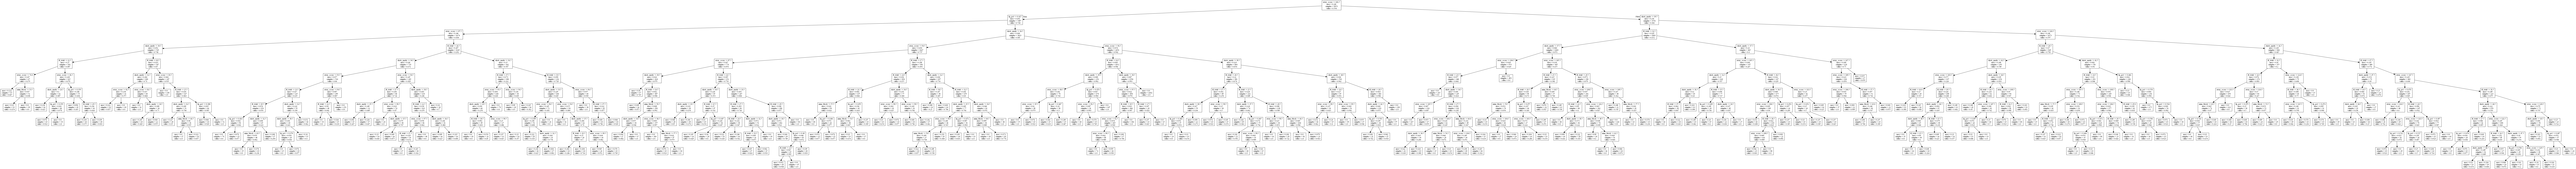

In [72]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Conclusion and Recommendation:

In most games that we play, "Winning is always everything". Same with sports especially when you are in the business of sports. NBA franchises generate money based on their performance during the game. Consistent poor performance can easily close down a franchise because you will lose top players and will have a hard time getting top players play for your team. Fans will then also transfer to the team where their favorite player has transferred and of course, who will be watching a game if they know that their favorite team will be losing anyway. For these reasons and more, it is helpful to find the factors or features that will help in determining whether a NBA game is going to be a win or a lose.

For this capstone project, the play by play dataset of NBA games from 12 seasons were used. These were from 2006 - 2017. The play by play dataset was used to create and engineer features that is deemed important to create a model that will predict whether a game is going to be a win or a lose. These features were: number of blocks, number of shots made, number of shots mised, turnover, highest score made during the game, number of players who got more than 10 points, number of assists, number of freethrows during the last 2 minutes, score difference between home and away teams within the last two minutes, field goal percentage, and freethrow percentage. These features all pertain to the home team. Random forest was used to be able to build the model and then after determining the most important features, the tree was visualized using Decision Tree (to see the hypothesis function).

To be able to build the model using random forest, it was recommended to tune hyperparameters first. This was done and it the optimized parameters were used to train and get the model. In addition, the top 5 features were also calculated and found out that they are: away score, number of shots made, field goal percentage, total of freethrows in a game, and number of blocks. Decision tree was used and as an example, it was found out that if total of shots made is more than 26.5, there is a 63.5% chance that the team will win the game. I think that the results are very helpful for coaches to know how to adjust prior to a game schedule based on past results and/or statistics for them to increase their chances of winning.

There are a lot of things that other researchers can build from this study. There are still a lot of features that we can use and can be engineered from the dataset such as difference between the home team score and away team score, whether the team previously won the game or not, defensive statistics from the home team, and also statistics from the away team. Researchers can also dig deeper by creating a parameterized model wherein they can input the name of their team and then the scheduled opponent and be able to really understand the features that will be very important for the team to win their next game.